<a href="https://colab.research.google.com/github/Givari17/Cluster_analysis_COD2023/blob/main/Clustering_Potensi_Sampah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import kelbow_visualizer
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
df = pd.read_csv('/content/Dataset_Sampah3.csv',sep=";")

In [ ]:
df

,No,Provinsi,Timbulan Sampah Tahunan(ton),Timbulan Sampah Harian(ton),PRDB,Daur Ulang sampah Tahunan (Ton/Tahun),Bahan Baku sampah Tahunan (Ton/Tahun)
0,1,Aceh,251097.01,687.94,39156010,15730.58,20.44
1,2,Bali,525962.04,1441.00,55544660,95205.02,1800.36
2,3,Banten,1256079.65,3441.31,60990140,12007.26,0.00
3,4,Bengkulu,38417.16,105.25,43741710,0.00,0.00
4,5,D.I Yogjakarta,472827.88,1295.42,44044640,41462.59,146.00
5,6,Gorontalo,51646.51,141.50,298359970,11231.41,365.00
6,7,Jambi,231663.81,646.13,39886780,23568.26,7585.57
7,8,Jawa Barat,1322647.07,3623.69,76096400,199641.22,35475.96
8,9,Jawa Tengah,4185487.25,11467.09,49038410,481179.78,164543.29
9,10,Jawa Timur,1770017.62,4849.38,42149540,305493.70,15908.76


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['No '], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Timbulan Sampah Tahunan(ton)'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['Timbulan Sampah Harian(ton)'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df, *['PRDB'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['No '], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Timbulan Sampah Tahunan(ton)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Timbulan Sampah Harian(ton)'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['PRDB'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df, *[[['No ', 'Timbulan Sampah Tahunan(ton)'], ['Timbulan Sampah Tahunan(ton)', 'Timbulan Sampah Harian(ton)'], ['Timbulan Sampah Harian(ton)', 'PRDB'], ['PRDB', 'Daur Ulang sampah Tahunan (Ton/Tahun)']]], **{})
chart

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   No                                     35 non-null     int64  
 1   Provinsi                               35 non-null     object 
 2   Timbulan Sampah Tahunan(ton)           35 non-null     float64
 3   Timbulan Sampah Harian(ton)            35 non-null     float64
 4   PRDB                                   35 non-null     int64  
 5   Daur Ulang sampah Tahunan (Ton/Tahun)  35 non-null     float64
 6   Bahan Baku sampah Tahunan (Ton/Tahun)  35 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.0+ KB


## **Data Preprocessing**

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()



0

In [ ]:
#Mengisi data yang hilang untuk dataset train
for i in df.columns:
    if(df[i].dtypes=="object"):
        x = df[i].mode()[0]
        df[i]=df[i].fillna(x)
    else:
        x = df[i].mean()
        df[i]=df[i].fillna(x)

df.isna().sum()

No                                       0
Provinsi                                 0
Timbulan Sampah Tahunan(ton)             0
Timbulan Sampah Harian(ton)              0
PRDB                                     0
Daur Ulang sampah Tahunan (Ton/Tahun)    0
Bahan Baku sampah Tahunan (Ton/Tahun)    0
dtype: int64

In [ ]:
df.shape

(35, 7)

In [ ]:
df1 = df.drop(["No ","Provinsi","PRDB"],axis=1)
df1

,Timbulan Sampah Tahunan(ton),Timbulan Sampah Harian(ton),Daur Ulang sampah Tahunan (Ton/Tahun),Bahan Baku sampah Tahunan (Ton/Tahun)
0,251097.01,687.94,15730.58,20.44
1,525962.04,1441.00,95205.02,1800.36
2,1256079.65,3441.31,12007.26,0.00
3,38417.16,105.25,0.00,0.00
4,472827.88,1295.42,41462.59,146.00
5,51646.51,141.50,11231.41,365.00
6,231663.81,646.13,23568.26,7585.57
7,1322647.07,3623.69,199641.22,35475.96
8,4185487.25,11467.09,481179.78,164543.29
9,1770017.62,4849.38,305493.70,15908.76


## **Analisis Korelasi**

In [ ]:
df1.corr()

,Timbulan Sampah Tahunan(ton),Timbulan Sampah Harian(ton),Daur Ulang sampah Tahunan (Ton/Tahun),Bahan Baku sampah Tahunan (Ton/Tahun)
Timbulan Sampah Tahunan(ton),1.000000,0.885941,0.819307,0.860366
Timbulan Sampah Harian(ton),0.885941,1.000000,0.946803,0.774269
Daur Ulang sampah Tahunan (Ton/Tahun),0.819307,0.946803,1.000000,0.731714
Bahan Baku sampah Tahunan (Ton/Tahun),0.860366,0.774269,0.731714,1.000000


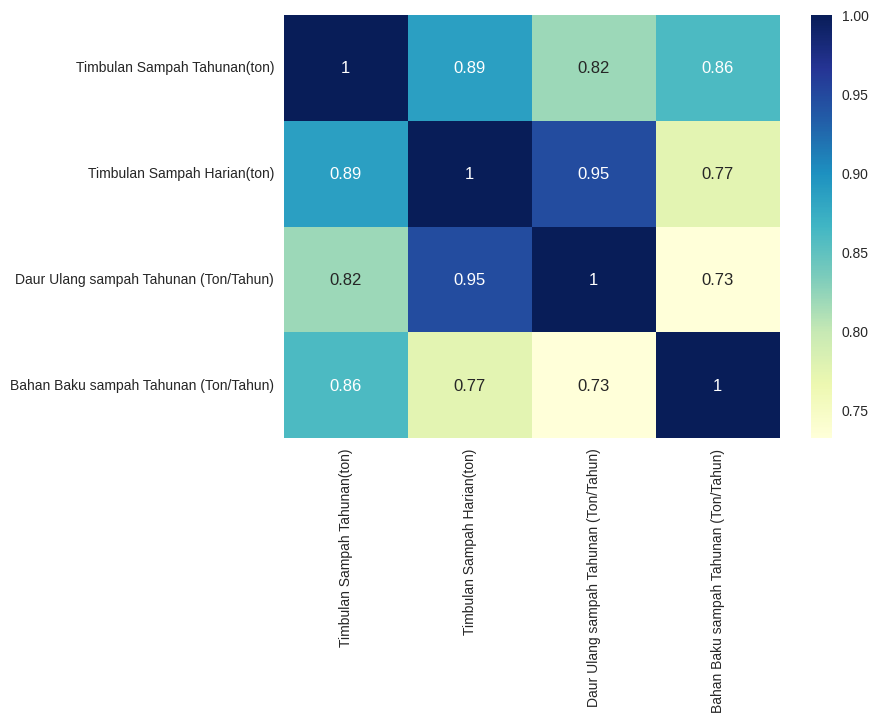

In [ ]:
import seaborn as sns
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True);

## **Menentukan Jmlah Cluster**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

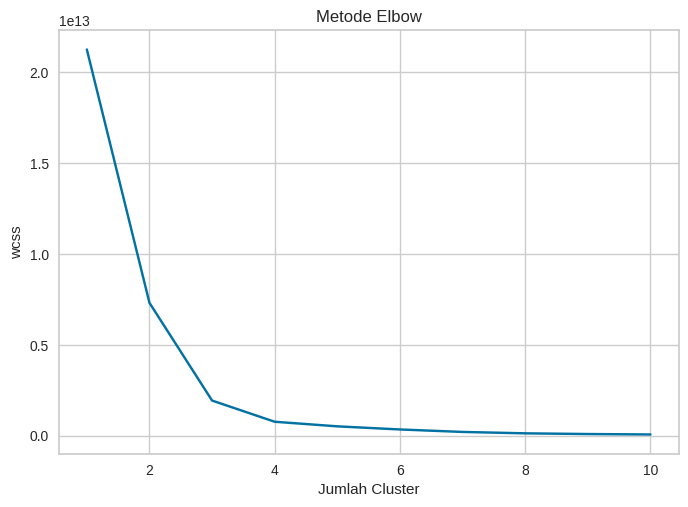

In [ ]:

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('wcss')
plt.show()

In [ ]:
array_x = np.array(df1)
array_x

array([[2.51097010e+05, 6.87940000e+02, 1.57305800e+04, 2.04400000e+01],
       [5.25962040e+05, 1.44100000e+03, 9.52050200e+04, 1.80036000e+03],
       [1.25607965e+06, 3.44131000e+03, 1.20072600e+04, 0.00000000e+00],
       [3.84171600e+04, 1.05250000e+02, 0.00000000e+00, 0.00000000e+00],
       [4.72827880e+05, 1.29542000e+03, 4.14625900e+04, 1.46000000e+02],
       [5.16465100e+04, 1.41500000e+02, 1.12314100e+04, 3.65000000e+02],
       [2.31663810e+05, 6.46130000e+02, 2.35682600e+04, 7.58557000e+03],
       [1.32264707e+06, 3.62369000e+03, 1.99641220e+05, 3.54759600e+04],
       [4.18548725e+06, 1.14670900e+04, 4.81179780e+05, 1.64543290e+05],
       [1.77001762e+06, 4.84938000e+03, 3.05493700e+05, 1.59087600e+04],
       [2.85287290e+05, 7.81620000e+02, 2.63124000e+03, 0.00000000e+00],
       [6.69151480e+05, 1.99059000e+03, 4.88801600e+04, 7.19285000e+03],
       [1.44180660e+05, 3.95020000e+02, 1.07982000e+03, 9.19620000e+02],
       [5.24485460e+05, 1.36016000e+03, 7.13527800e

In [ ]:
#Normalisasi Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(array_x)
print(x)

[[5.86180769e-02 5.74353925e-02 3.26916896e-02 1.24222629e-04]
 [1.24385059e-01 1.23285455e-01 1.97857483e-01 1.09415583e-02]
 [2.99080368e-01 2.98199192e-01 2.49537917e-02 0.00000000e+00]
 [7.73014918e-03 6.48304736e-03 0.00000000e+00 0.00000000e+00]
 [1.11671643e-01 1.10555457e-01 8.61686042e-02 8.87304490e-04]
 [1.08955370e-02 9.65286753e-03 2.33414006e-02 2.21826122e-03]
 [5.39682933e-02 5.37793875e-02 4.89801546e-02 4.61007556e-02]
 [3.15007961e-01 3.14147104e-01 4.14899437e-01 2.15602593e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [4.22050354e-01 4.21325501e-01 6.34884741e-01 9.66843437e-02]
 [6.67987884e-02 6.56270822e-02 5.46830958e-03 0.00000000e+00]
 [1.58646009e-01 1.71343427e-01 1.01583986e-01 4.37140281e-02]
 [3.30361918e-02 3.18214967e-02 2.24410926e-03 5.58892435e-03]
 [1.24031757e-01 1.16216538e-01 1.48287154e-01 6.33078383e-02]
 [3.50405071e-03 2.25253979e-03 3.12274136e-03 1.35041058e-02]
 [1.66719478e-02 1.54363684e-02 1.71203162e-02 6.654783

## **Modelling**

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
y_kmeans

array([0, 3, 3, 0, 3, 0, 0, 2, 1, 2, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 2], dtype=int32)

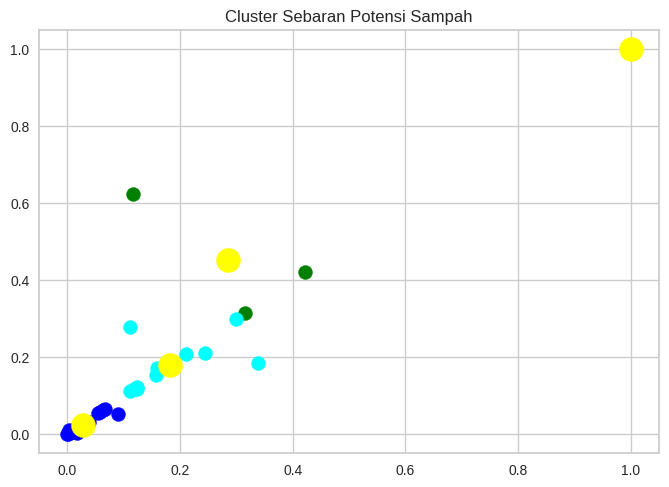

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids')
plt.title('Cluster Sebaran Potensi Sampah')
plt.show()

## **Accuracy**

In [ ]:
from seaborn.colors import xkcd_rgb
silhouette_score_average = silhouette_score(x, kmeans.predict(x))
print(silhouette_score_average)

0.6141363779401363


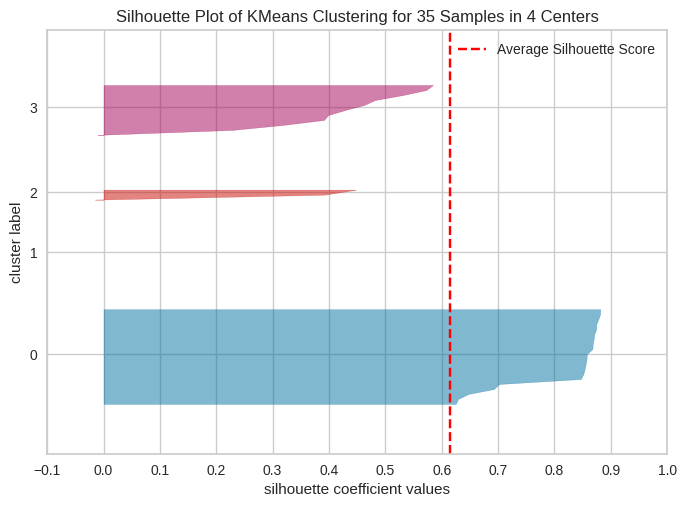

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 35 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
Visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
Visualizer.fit(x)
Visualizer.show()

In [ ]:
df2 = pd.DataFrame(y_kmeans)
print(df2)

    0
0   0
1   3
2   3
3   0
4   3
5   0
6   0
7   2
8   1
9   2
10  0
11  3
12  0
13  3
14  0
15  0
16  3
17  0
18  0
19  0
20  0
21  0
22  0
23  0
24  0
25  3
26  0
27  3
28  0
29  0
30  0
31  3
32  3
33  3
34  2


In [ ]:
Submission = pd.concat([df,df2], axis=1)
print(Submission)

    No                    Provinsi  Timbulan Sampah Tahunan(ton)  \
0     1                       Aceh                     251097.01   
1     2                       Bali                     525962.04   
2     3                     Banten                    1256079.65   
3     4                   Bengkulu                      38417.16   
4     5             D.I Yogjakarta                     472827.88   
5     6                  Gorontalo                      51646.51   
6     7                      Jambi                     231663.81   
7     8                 Jawa Barat                    1322647.07   
8     9                Jawa Tengah                    4185487.25   
9    10                 Jawa Timur                    1770017.62   
10   11           Kalimantan Barat                     285287.29   
11   14         Kalimantan Selatan                     669151.48   
12   13          Kalimantan Tengah                     144180.66   
13   12           Kalimantan Timur              

In [ ]:
Submission.to_csv('Final_Submission.csv', index=False)